In [1]:
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Verify TensorFlow installation
print(f"TensorFlow Version: {tf.__version__}")

# Load the .mat file
file_path = './EV_Rank_1_52_RBs_50_UEs_1000_snaps.mat'
data = scipy.io.loadmat(file_path)

# Extract the relevant data
EV_data = data['EV_re_im_split']
data = EV_data
del EV_data
print("Original data shape:", data.shape)

# Consider only the first 450 timesteps
# data = data[:, :450, :]
data = data[:, 750:, :]

print("Data shape after slicing timesteps:", data.shape)

# Prepare the data: using the first 5 timesteps to predict the 6th timestep
X = []
y = []

for i in range(data.shape[1] - 5):
    X.append(data[:, i:i+5, :])
    y.append(data[:, i+5, :])

X = np.array(X)
y = np.array(y)

# Reshape X to have the shape (number of samples, 5 timesteps, 832 features)
X = X.reshape(-1, 5, 832)
y = y.reshape(-1, 832)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the improved LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(5, 832), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(832))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


2024-05-24 00:52:08.895299: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow Version: 2.16.1
Original data shape: (50, 1000, 832)
Data shape after slicing timesteps: (50, 250, 832)
X_train shape: (9800, 5, 832)
y_train shape: (9800, 832)
X_test shape: (2450, 5, 832)
y_test shape: (2450, 832)


2024-05-24 00:52:12.960479: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-24 00:52:12.973144: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-24 00:52:12.975719: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/100


I0000 00:00:1716492135.819298  544703 service.cc:145] XLA service 0x7ad458003e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716492135.819334  544703 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-05-24 00:52:15.901210: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-24 00:52:16.259882: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 40/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0155

I0000 00:00:1716492140.502291  544703 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


307/307 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 0.0143 - val_loss: 0.0115 - learning_rate: 0.0010
Epoch 2/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0117 - val_loss: 0.0106 - learning_rate: 0.0010
Epoch 3/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0111 - val_loss: 0.0103 - learning_rate: 0.0010
Epoch 4/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 5/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107 - val_loss: 0.0099 - learning_rate: 0.0010
Epoch 6/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 7/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - val_loss: 0.0097 - learning_rate: 0.0010
Epoch 8/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0097 - learning_rate: 0.0010
Epoch 9/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 10/10

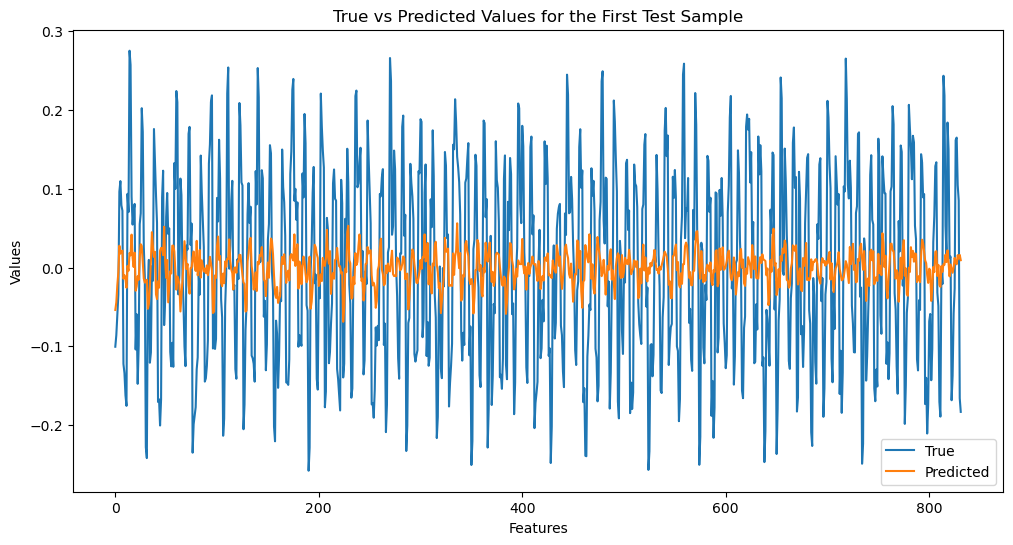

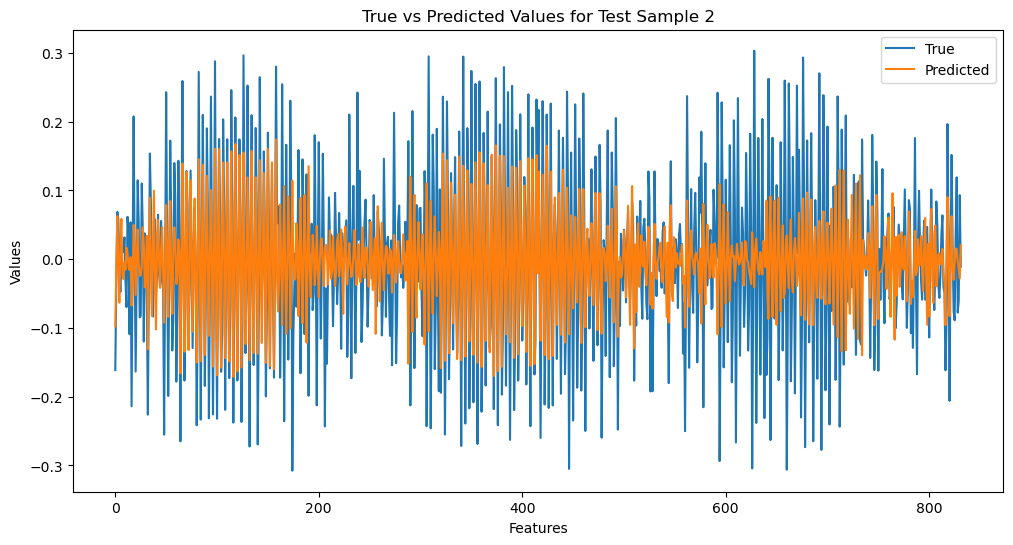

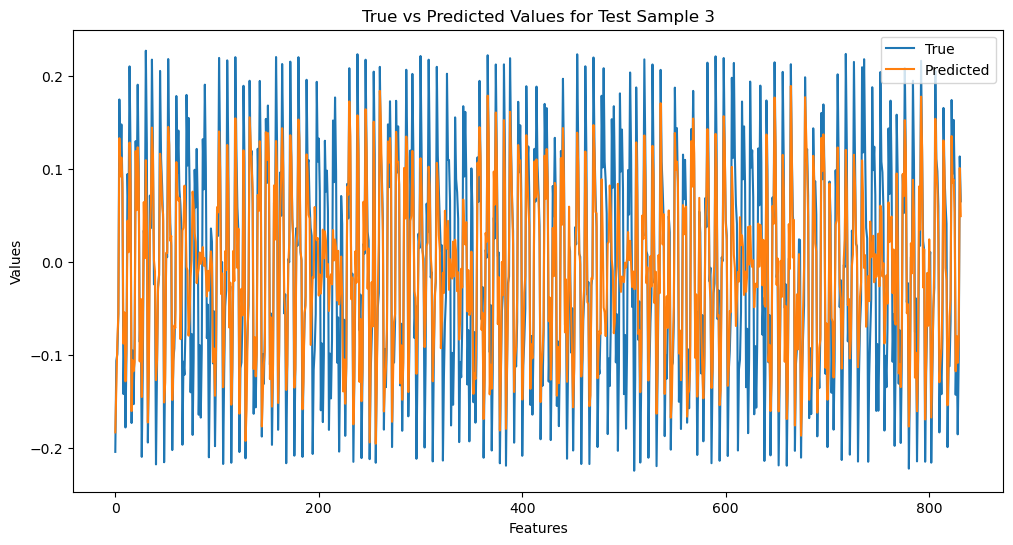

In [2]:

# Visualize some predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test[0], label='True')
plt.plot(predictions[0], label='Predicted')
plt.legend()
plt.title('True vs Predicted Values for the First Test Sample')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# Repeat for more samples if needed
for i in range(1, 3):  # Adjust the range for more samples
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[i], label='True')
    plt.plot(predictions[i], label='Predicted')
    plt.legend()
    plt.title(f'True vs Predicted Values for Test Sample {i+1}')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()
